<a href="https://colab.research.google.com/github/douglassesi/Python/blob/douglas/8_Exercicio_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ativando o Google Drive

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


#Import das bibliotecas

In [0]:
import pandas as pd
import seaborn as sb
import numpy as np
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz, plot_tree
import pydotplus
from IPython.display import display
import graphviz
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from xgboost import XGBClassifier
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [0]:
from sklearn.model_selection import GridSearchCV

#Carregando o arquivo

In [0]:
filename = '/gdrive/My Drive/Trabalhos 11IA/Modelos de IA/8 - Exercício 8/TrabalhoEx8.csv'

df =  pd.read_csv(filename, sep=";")
df 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,-122.23,452600.0,129.0,41.0,880.0,D,126.0,322.0,83.252,37.88
1,-122.22,358500.0,1106.0,21.0,7099.0,D,1138.0,2401.0,83.014,37.86
2,-122.24,352100.0,190.0,52.0,1467.0,D,177.0,496.0,72.574,37.85
3,-122.25,341300.0,235.0,52.0,1274.0,D,219.0,558.0,56.431,37.85
4,-122.25,342200.0,280.0,52.0,1627.0,D,259.0,565.0,38.462,37.85
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,78100.0,374.0,25.0,1665.0,B,330.0,845.0,15.603,39.48
20636,-121.21,77100.0,150.0,18.0,697.0,B,114.0,356.0,25.568,39.49
20637,-121.22,92300.0,485.0,17.0,2254.0,B,433.0,1007.0,1.700,39.43
20638,-121.32,84700.0,409.0,18.0,1860.0,B,349.0,741.0,18.672,39.43


##Pré-análise

###Identificando casos em branco

In [0]:
df.isnull().sum()

V1       0
V2       0
V3     207
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
dtype: int64

###A coluna V6 aparenta ser categórica

In [0]:
np.unique(df['V6'])

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

#Pré-processamento

###Removendo os itens vazios

In [0]:
df.fillna(method='ffill', inplace=True)

In [0]:
df.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
dtype: int64

##Separando os dados Categóricos

In [0]:
cat_df = pd.get_dummies(data=df,
                     columns=['V6'], drop_first=False)


###Drop das colunas categóricas antes do tratamento

In [0]:
drop_df = df.drop(['V6'], axis=1, inplace=True)

##Concatenando os dados Categóricos com os dados numéricos

In [0]:
df_dmy = pd.concat([drop_df,cat_df],axis=1)
df_dmy

,V1,V2,V3,V4,V5,V7,V8,V9,V10,V6_A,V6_B,V6_C,V6_D,V6_E
0,-122.23,452600.0,129.0,41.0,880.0,126.0,322.0,83.252,37.88,0,0,0,1,0
1,-122.22,358500.0,1106.0,21.0,7099.0,1138.0,2401.0,83.014,37.86,0,0,0,1,0
2,-122.24,352100.0,190.0,52.0,1467.0,177.0,496.0,72.574,37.85,0,0,0,1,0
3,-122.25,341300.0,235.0,52.0,1274.0,219.0,558.0,56.431,37.85,0,0,0,1,0
4,-122.25,342200.0,280.0,52.0,1627.0,259.0,565.0,38.462,37.85,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,78100.0,374.0,25.0,1665.0,330.0,845.0,15.603,39.48,0,1,0,0,0
20636,-121.21,77100.0,150.0,18.0,697.0,114.0,356.0,25.568,39.49,0,1,0,0,0
20637,-121.22,92300.0,485.0,17.0,2254.0,433.0,1007.0,1.700,39.43,0,1,0,0,0
20638,-121.32,84700.0,409.0,18.0,1860.0,349.0,741.0,18.672,39.43,0,1,0,0,0


#Clusterização

##Modelo K-Means

###Normalizando os dados

In [0]:
df_normalizacao = StandardScaler().fit_transform(df_dmy.iloc[:,:8])
df_cluster = StandardScaler().fit_transform(df_normalizacao)

In [0]:
df_cluster

array([[-1.32783522,  2.12963148, -0.97095437, ..., -0.97703285,
        -0.9744286 ,  2.26896309],
       [-1.32284391,  1.31415614,  1.35044693, ...,  1.66996103,
         0.86143887,  2.25807484],
       [-1.33282653,  1.25869341, -0.8260153 , ..., -0.84363692,
        -0.82077735,  1.78045608],
       ...,
       [-0.8237132 , -0.99274649, -0.12508041, ..., -0.17404163,
        -0.3695372 , -1.46195311],
       [-0.87362627, -1.05860847, -0.30566024, ..., -0.39375258,
        -0.60442933, -0.68550238],
       [-0.83369581, -1.01787803,  0.1861822 , ...,  0.07967221,
        -0.03397701, -0.4469675 ]])

###Redução de dimensionalidade com PCA

In [0]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df_cluster)

#principalComponents.index = df_cluster.index

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [0]:
principalDf

,principal component 1,principal component 2
0,-1.871269,3.383173
1,3.142388,2.516581
2,-1.786123,2.490188
3,-1.745100,1.897218
4,-1.608217,1.338559
...,...,...
20635,-0.940174,-1.242995
20636,-1.755177,-0.915518
20637,-0.376783,-1.648523
20638,-0.748705,-1.125402


####Aplicação do Método Elbow para identificar a quantidade de clusters a ser utilizado

In [0]:
inertias =[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, max_iter=1000).fit(principalDf)    
    #somatório dos erros quadráticos das instâncias de cada cluster
    inertias.append(kmeans.inertia_)

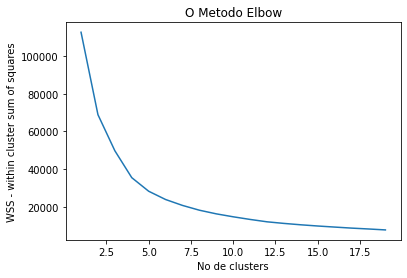

In [0]:
plt.figure(1)
plt.plot(range(1, 20), inertias)
plt.title('O Metodo Elbow')
plt.xlabel('No de clusters')
plt.ylabel('WSS - within cluster sum of squares')
plt.show()

####Treinando o modelo K-Means para 5 clusters

In [0]:
kmeans5 = KMeans(n_clusters=5)

In [0]:
kmeans5.fit(principalDf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

####Incluindo o ID do Cluster no Dataset

In [0]:
principalDf["clusters"] = kmeans5.labels_
df_dmy['cluster'] = kmeans5.labels_

####Plot dos dados (PCA) e os clusters identificados

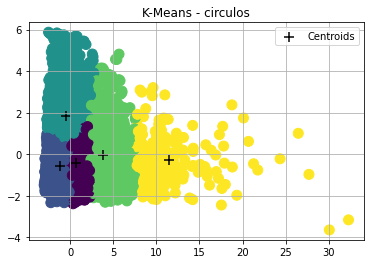

In [0]:
fig, ax = plt.subplots()
plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'],c=principalDf.clusters, s=100)
plt.scatter(kmeans5.cluster_centers_[:,0],kmeans5.cluster_centers_[:,1],s=100,c='black',label="Centroids",marker='+')
plt.title("K-Means - circulos")
ax.legend()
ax.grid(True)
plt.show()

In [0]:
df_dmy

,V1,V2,V3,V4,V5,V7,V8,V9,V10,V6_A,V6_B,V6_C,V6_D,V6_E,cluster
0,-122.23,452600.0,129.0,41.0,880.0,126.0,322.0,83.252,37.88,0,0,0,1,0,2
1,-122.22,358500.0,1106.0,21.0,7099.0,1138.0,2401.0,83.014,37.86,0,0,0,1,0,3
2,-122.24,352100.0,190.0,52.0,1467.0,177.0,496.0,72.574,37.85,0,0,0,1,0,2
3,-122.25,341300.0,235.0,52.0,1274.0,219.0,558.0,56.431,37.85,0,0,0,1,0,2
4,-122.25,342200.0,280.0,52.0,1627.0,259.0,565.0,38.462,37.85,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,78100.0,374.0,25.0,1665.0,330.0,845.0,15.603,39.48,0,1,0,0,0,1
20636,-121.21,77100.0,150.0,18.0,697.0,114.0,356.0,25.568,39.49,0,1,0,0,0,1
20637,-121.22,92300.0,485.0,17.0,2254.0,433.0,1007.0,1.700,39.43,0,1,0,0,0,1
20638,-121.32,84700.0,409.0,18.0,1860.0,349.0,741.0,18.672,39.43,0,1,0,0,0,1


In [0]:
#df_dmy.groupby('cluster').count()

Há um cluster que tem volume muito pequeno de dados comparado aos demais.

#Classificação

##Determinação de Features

In [0]:
X = df_dmy.iloc[:,0:14]
X

,V1,V2,V3,V4,V5,V7,V8,V9,V10,V6_A,V6_B,V6_C,V6_D,V6_E
0,-122.23,452600.0,129.0,41.0,880.0,126.0,322.0,83.252,37.88,0,0,0,1,0
1,-122.22,358500.0,1106.0,21.0,7099.0,1138.0,2401.0,83.014,37.86,0,0,0,1,0
2,-122.24,352100.0,190.0,52.0,1467.0,177.0,496.0,72.574,37.85,0,0,0,1,0
3,-122.25,341300.0,235.0,52.0,1274.0,219.0,558.0,56.431,37.85,0,0,0,1,0
4,-122.25,342200.0,280.0,52.0,1627.0,259.0,565.0,38.462,37.85,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,78100.0,374.0,25.0,1665.0,330.0,845.0,15.603,39.48,0,1,0,0,0
20636,-121.21,77100.0,150.0,18.0,697.0,114.0,356.0,25.568,39.49,0,1,0,0,0
20637,-121.22,92300.0,485.0,17.0,2254.0,433.0,1007.0,1.700,39.43,0,1,0,0,0
20638,-121.32,84700.0,409.0,18.0,1860.0,349.0,741.0,18.672,39.43,0,1,0,0,0


##Determinação de Target

In [0]:
y = df_dmy['cluster']
y

0        2
1        3
2        2
3        2
4        2
        ..
20635    1
20636    1
20637    1
20638    1
20639    0
Name: cluster, Length: 20640, dtype: int32

##Separação da massa de teste e treino

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=30)

###Modelo de Árvore de Decisão 

In [0]:
model_tree = DecisionTreeClassifier(max_depth=7)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

In [0]:
cm = confusion_matrix(y_test,y_pred_tree)

####Resultado

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1050
           1       0.95      0.95      0.95      1875
           2       0.93      0.91      0.92       850
           3       0.94      0.92      0.93       314
           4       0.95      0.90      0.92        39

    accuracy                           0.93      4128
   macro avg       0.93      0.92      0.92      4128
weighted avg       0.93      0.93      0.93      4128

0.9285368217054264


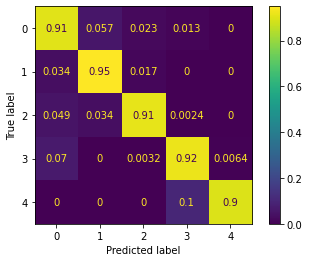

In [0]:
plot_confusion_matrix(model_tree, X_test, y_test, normalize = 'true')

print(classification_report(y_test, y_pred_tree))
print(accuracy_score(y_test, y_pred_tree))


####Plot da Árvore de decisão

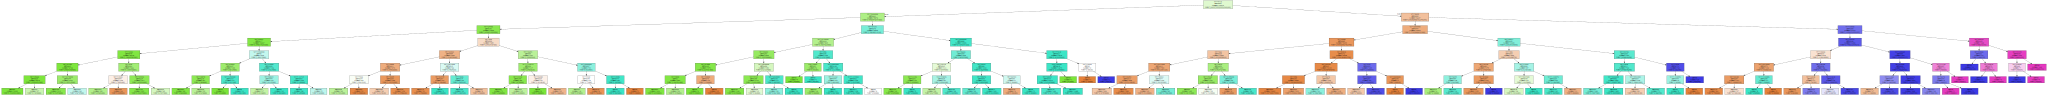

In [0]:
display(
    graphviz.Source(tree.export_graphviz(
        model_tree, 
        feature_names=df_dmy.columns.values[0:14],  
        filled=True)))

###Modelo de KNN

####Encontrando o valor ideal de k

[0.8178294573643411, 0.809593023255814, 0.8398740310077519, 0.8316375968992248, 0.8398740310077519, 0.8393895348837209, 0.8473837209302325, 0.843265503875969, 0.844718992248062, 0.84375, 0.844234496124031, 0.8376937984496124, 0.8403585271317829, 0.8381782945736435, 0.8406007751937985, 0.8350290697674418, 0.8374515503875969, 0.8352713178294574, 0.8347868217054264, 0.8318798449612403, 0.8326065891472868, 0.8311531007751938, 0.8304263565891473, 0.8316375968992248, 0.8287306201550387]


Text(0, 0.5, 'Testing Accuracy')

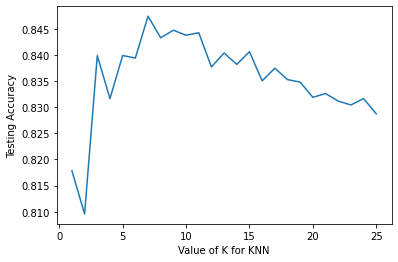

In [0]:
k_range=range(1,26)
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_knn))

print(scores)
#Plota os valores de acc. em função do valor escolhido de K
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

####Treinando o modelo KNN

In [0]:
model_KNN = KNeighborsClassifier(n_neighbors=7)

In [0]:
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

####Testando o modelo criado

In [0]:
y_pred = model_KNN.predict(X_test)

####Resultado

In [0]:
cm = confusion_matrix(y_test,y_pred_knn)

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1050
           1       0.87      0.92      0.90      1875
           2       0.74      0.84      0.79       850
           3       0.86      0.62      0.72       314
           4       1.00      0.21      0.34        39

    accuracy                           0.83      4128
   macro avg       0.86      0.67      0.71      4128
weighted avg       0.83      0.83      0.83      4128

0.8287306201550387


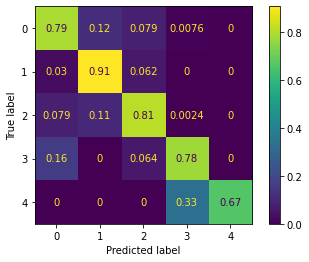

In [0]:
plot_confusion_matrix(model_KNN, X_test, y_test, normalize = 'true')

print(classification_report(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))


###Modelo XGBOOST

####Treinando o Modelo XGBOOST

In [0]:
model_xgboost = XGBClassifier()

In [0]:
model_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

####Testando o modelo XGBOOST

In [0]:
y_pred_xg = model_xgboost.predict(X_test)

####Resultado

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1050
           1       0.98      0.98      0.98      1875
           2       0.97      0.96      0.96       850
           3       0.97      0.96      0.97       314
           4       0.97      0.95      0.96        39

    accuracy                           0.97      4128
   macro avg       0.97      0.96      0.97      4128
weighted avg       0.97      0.97      0.97      4128

0.9694767441860465


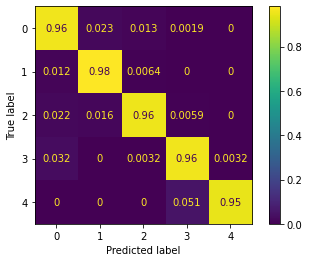

In [0]:
plot_confusion_matrix(model_xgboost, X_test, y_test, normalize = 'true')

print(classification_report(y_test, y_pred_xg))
print(accuracy_score(y_test, y_pred_xg))


##Análise Final Classificação


---


Para a Classificação do modelo o XGBOOST apresentou um melhor resultado, atingindo a acurácia de 97%. Vale destacar que mesmo para o cluster 
que tem uma amostragem baixa o modelo se comportou melhor que os demais modelos.
Considerando o custo benefício do modelo, o XGBOOST teve performance equivalente aos demais e melhor acurácia.
O XBOOST seria o melhor modelo para o case

#Regressão

Predição do valor de V2

In [0]:
#df_dmy

##Determinação de Features

In [0]:
X_reg = df_dmy.drop(['V2'], axis=1, inplace=False)

##Determinação de Target

In [0]:
y_reg = df_dmy['V2']

##Separação de massas de teste e treino

In [0]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size= .2, random_state=30)

###Modelo SVR

O modelo SVR necessita de normalização dos dados. Aplicamos em pipeline.

####Treinando o modelo SVR

In [0]:
model_SVR = make_pipeline(StandardScaler(), SVR())
model_SVR.fit(X_train_reg, y_train_reg)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

####Testando o modelo SVR

In [0]:
y_pred_svr = model_SVR.predict(X_test_reg)

####Resultado

In [0]:
mse_SVR = mean_squared_error(y_test_reg, y_pred_svr)
score_svr = model_SVR.score(X_test_reg, y_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_svr)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_svr, mse, np.sqrt(mse)))

R2:-0.055, MSE:14552285227.93, RMSE:120632.85


###Modelo Regressão Linear

####Treinando o modelo de Regressão Linear

In [0]:
model_Linear = LinearRegression()  
model_Linear.fit(X_train_reg, y_train_reg) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

####Testando o modelo de Regressão Linear

In [0]:
y_pred_Linear = model_Linear.predict(X_test_reg)

####Resultado

In [0]:
mse_Linear = mean_squared_error(y_test_reg, y_pred_Linear)
score_linear = model_Linear.score(X_test_reg, y_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_Linear)
print("Resultado Regressão Linear: R2:{0:.7f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_linear, mse, np.sqrt(mse)))

Resultado Regressão Linear: R2:0.5322372, MSE:6451138049.29, RMSE:80318.98


###Modelo ElasticNet

####Treinando o Modelo ElasticNet

In [0]:
model_elastic = ElasticNet(alpha=0.0001)
model_elastic.fit(X_train_reg, y_train_reg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47496816358185.9, tolerance: 21787900459.897945
  positive)


ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

####Testando o modelo ElasticNet

In [0]:
y_pred_elastic = model_elastic.predict(X_test_reg)

####Resultado

In [0]:

score_elastic = model_elastic.score(X_test_reg, y_test_reg)
mse_elastic = mean_squared_error(y_test_reg, y_pred_elastic)
print("Resultado ElasticNet: R2:{0:.7f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_elastic, mse_elastic, np.sqrt(mse_elastic)))

Resultado ElasticNet: R2:0.5322324, MSE:6451204495.00, RMSE:80319.39


###Modelo Regressão Logística

####Treinando o modelo de Regressão Logística

In [0]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train_reg,y_train_reg )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

####Testando o modelo de Regressão Logística

In [0]:
y_pred_logistic = model_logistic.predict(X_test_reg)

####Resultado

In [0]:
score_logistic = model_logistic.score(X_test_reg, y_test_reg)
mse_logistic = mean_squared_error(y_test_reg, y_pred_logistic)
print("Resultado Regressão Logística: R2:{0:.7f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_logistic, mse_logistic, np.sqrt(mse_logistic)))

Resultado Regressão Logística: R2:0.0489341, MSE:57413611192.65, RMSE:239611.38


##Análise Final Classificação


---


Para a Regressão para predizer o valor de V2 utilizamos 3 modelos diferentes: SVR, Regressão Linear, ElasticNet e Regressão Logística.
Os Modelos de SVR e Regressão logística tiveram resultados baixos e não satisfatórios. Além disso, particularmente o modelo de Regressão Logística, o processamento foi bem custoso.
Quando analisamos os melhores modelos: Regressão Linear e ElasticNET, temos resultados bem similares, porém com vantagem para Regressão Linear devido aos resultados e custo de processamento. O ElasticNet para conseguirmos um resultado melhor precisamos ajustar os parâmetros, aumentando o custo de treinamento. Nas simulações realizadas o melhor resultado foi igual ao resultado da Regressão Linear.
De modo geral, para o case, a Regressão Linear seria o melhor modelo para predizer o V2.
